***
# Pre Process 
***

In [1]:
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#for easy access to path
import sys
import os

#importing packages for data manuplation and visualization
import numpy as np
import pandas as pd
import math


In [2]:
#Acessing scripts and data path
sys.path.append(os.path.abspath(os.path.join('data')))
sys.path.insert(0,'../scripts/')

In [3]:
#import local libraries
from clean_train_test_df import CleanStoreDf
from data_preview import DataPreview
from data_loader import load_df_from_csv
from data_manipulation import DataManipulator
from plots import *
from result import ResultPicker
from sklearn import preprocessing

In [4]:
#reading our data
pd.set_option('max_column', None)
pd.set_option('max_rows', None)

store_df=pd.read_csv('../data/store.csv')
train_df=pd.read_csv('../data/train.csv')
test_df=pd.read_csv('../data/test.csv')


In [5]:
#creating an object
store_data=DataPreview(store_df)
train_data=DataPreview(train_df)
test_data=DataPreview(test_df)


results = ResultPicker()

In [6]:
train_data_info = DataPreview(train_df)
train_data_info.show_datatypes()
#train_data_info.get_col_unique_value_count('Store')

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [7]:
store_data_info = DataPreview(store_df)
store_data_info.show_datatypes()

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

## <font color='darkolivegreen'>Missing Value</font>

#### STORE DATASET

In [8]:
missing = store_data.percent_missing(store_df)
results.add_data('missing_data',missing)
missing

#get the missing percenatage in each columns
store_data.missing_values_table()

The dataset contains 21.01 % missing values.


,total_missing_values,missing_percentage
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
CompetitionDistance,3,0.27 %
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
Promo2,0,0.0 %


#### TEST DATASET

In [12]:
missing_test = test_data.percent_missing(test_df)
results.add_data('missing_data',missing_test)
missing

#get the missing percenatage in each columns
test_data.missing_values_table()

The dataset contains 0.0 % missing values.


,total_missing_values,missing_percentage
Open,11,0.03 %
Id,0,0.0 %
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


#### TRAIN DATASET

In [13]:
missing_train = train_data.percent_missing(train_df)
results.add_data('missing_data',missing_train)
missing

#get the missing percenatage in each columns
train_data.missing_values_table()

The dataset contains 0.0 % missing values.


,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


In [14]:
from clean_train_test_df import CleanStoreDf

In [15]:
# object creation 
train_data_cleaner = CleanStoreDf(train_df)
test_data_cleaner = CleanStoreDf(test_df)
store_data_cleaner=CleanStoreDf(store_df)

In [16]:
#changing the datatype of date column
train_data_cleaner.change_column_to_date_type('Date')
test_data_cleaner.change_column_to_date_type('Date')

In [17]:
train_data_cleaner.df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [18]:
test_data_cleaner.df.dtypes

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

>`The Date column on both Train and Test is changed to datetime.`

In [19]:
# Separating date for train and test
train_data_cleaner.separate_date_column(date_column='Date')
test_data_cleaner.separate_date_column(date_column='Date')

In [20]:
train_data_cleaner.df.dtypes

Store             int64
DayOfWeek         int64
Year              int64
Month             int64
Day               int64
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [21]:
store_data_cleaner.df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [22]:
train_df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Year                      int64
Month                     int64
Day                       int64
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [23]:
store_df.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

>`Separation complete!`

In [24]:
#merging store and train dataset 
merged_train_store_df = pd.merge(train_df, store_df, on=['Store'], how='inner')

In [25]:
merged_df=DataPreview(merged_train_store_df)

In [26]:
merged_train_store_df.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Year                                  int64
Month                                 int64
Day                                   int64
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [27]:
merged_train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Year                       1017209 non-null  int64         
 4   Month                      1017209 non-null  int64         
 5   Day                        1017209 non-null  int64         
 6   Sales                      1017209 non-null  int64         
 7   Customers                  1017209 non-null  int64         
 8   Open                       1017209 non-null  int64         
 9   Promo                      1017209 non-null  int64         
 10  StateHoliday               1017209 non-null  object        
 11  SchoolHoliday              1017209 no

>`Merging Complete!`

### <font color='darkolivegreen'>Merged Store Train data Missing Value</font>

In [28]:
missing = merged_df.percent_missing(merged_train_store_df)
results.add_data('missing_data',missing)
missing
merged_df.missing_values_table()

The dataset contains 10.17 % missing values.


,total_missing_values,missing_percentage
PromoInterval,508031,49.94 %
Promo2SinceYear,508031,49.94 %
Promo2SinceWeek,508031,49.94 %
CompetitionOpenSinceYear,323348,31.79 %
CompetitionOpenSinceMonth,323348,31.79 %
CompetitionDistance,2642,0.26 %
SchoolHoliday,0,0.0 %
Promo2,0,0.0 %
Assortment,0,0.0 %
StoreType,0,0.0 %


>`Our merged data has 10% missing values`

###### <font color='darkolivegreen'>Fill Missing Value</font>

In [29]:
# Filling Missing Values
try:
    merged_train_store_df['CompetitionDistance'].fillna(merged_train_store_df['CompetitionDistance'].median(), inplace = True)
    merged_train_store_df['CompetitionOpenSinceMonth'].fillna(merged_train_store_df['CompetitionOpenSinceMonth'].mode().iloc[0], inplace = True)
    merged_train_store_df['CompetitionOpenSinceYear'].fillna(merged_train_store_df['CompetitionOpenSinceYear'].mode().iloc[0], inplace = True)
# 
    merged_train_store_df['Promo2SinceWeek'].fillna(merged_train_store_df['Promo2SinceWeek'].mode().iloc[0], inplace=True)
    merged_train_store_df['Promo2SinceYear'].fillna(merged_train_store_df['Promo2SinceYear'].mode().iloc[0], inplace = True)
    merged_train_store_df['PromoInterval'].fillna(merged_train_store_df['PromoInterval'].mode().iloc[0], inplace=True)
#     
except Exception as e:
    print("Failed to fill missing vlaues")

In [30]:
missing = merged_df.percent_missing(merged_train_store_df)
results.add_data('missing_data',missing)

The dataset contains 0.0 % missing values.


In [31]:
missing = merged_df.percent_missing(merged_train_store_df)

The dataset contains 0.0 % missing values.


>`Missing value Filled!`

### <font color='darkolivegreen'>Checking Outliers</font>

<AxesSubplot:xlabel='Sales'>

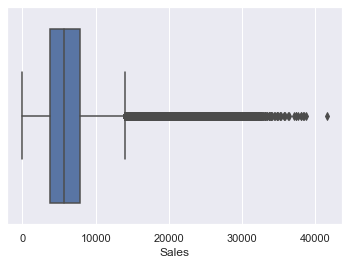

In [32]:
sns.set()
sns.boxplot(data=merged_train_store_df,x='Sales')

>`outliers for Sales.`

<AxesSubplot:xlabel='Store'>

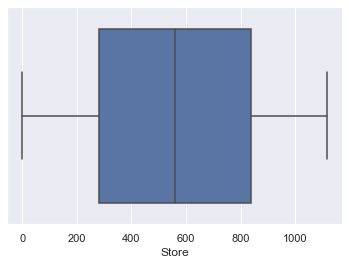

In [33]:
sns.boxplot(data=merged_train_store_df,x='Store')

>`outliers for Store.`

<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

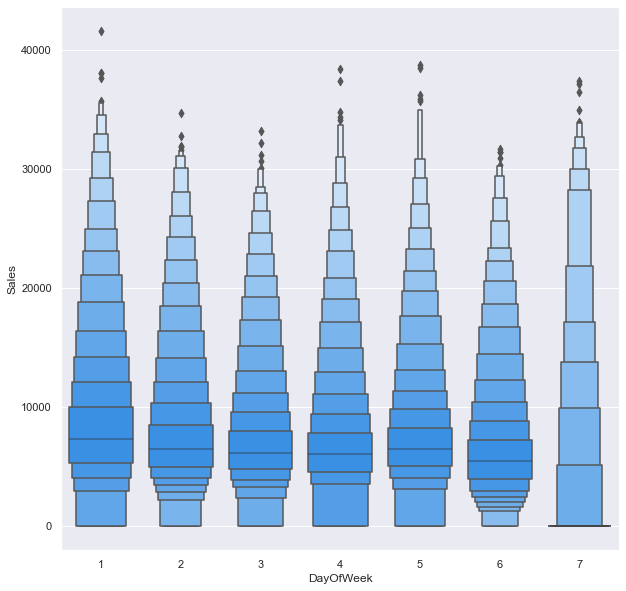

In [34]:
plt.figure(figsize=(10,10))
sns.set()
sns.boxenplot(data=merged_train_store_df,scale="linear",x="DayOfWeek",y="Sales",color="dodgerblue")

In [35]:
#for replacing outliers 
def replace_outlier_with_median(dataFrame: pd.DataFrame, feature: str) -> pd.DataFrame:

        Q1 = dataFrame[feature].quantile(0.25)
        Q3 = dataFrame[feature].quantile(0.75)
        median = dataFrame[feature].quantile(0.50)

        IQR = Q3 - Q1

        upper_whisker = Q3 + (1.5 * IQR)
        lower_whisker = Q1 - (1.5 * IQR)

        dataFrame[feature] = np.where(
            dataFrame[feature] > upper_whisker, median, dataFrame[feature])
        dataFrame[feature] = np.where(
            dataFrame[feature] < lower_whisker, median, dataFrame[feature])

        return dataFrame

In [ ]:
#train_store_cleaner = DataCleaner(train_store)

In [36]:
replace_outlier_with_median(merged_train_store_df, 'Customers')
replace_outlier_with_median(merged_train_store_df, 'Sales')
merged_train_store_df.head()

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,31,5263.0,555.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
1,1,4,2015-07-30,2015,7,30,5020.0,546.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,1,3,2015-07-29,2015,7,29,4782.0,523.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,1,2,2015-07-28,2015,7,28,5011.0,560.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,1,1,2015-07-27,2015,7,27,6102.0,612.0,1,1,0,1,c,a,1270.0,9.0,2008.0,0,14.0,2011.0,"Jan,Apr,Jul,Oct"


### <font color='darkolivegreen'>Feature extraction</font>

In [ ]:
manuplator= DataManipulator(merged_train_store_df)

In [38]:
# adding weekdays feature
manuplator.add_week_day('DayOfWeek')

Data Manipulatior:INFO->Successfully Added WeekDay Column to the DataFrame


In [39]:
# adding number of days
manuplator.add_number_of_days_to_holiday('StateHoliday')

Data Manipulatior:INFO->Successfully Added DaysToHoliday Column


In [57]:
# adding number of days after holydays
manuplator.add_number_of_days_after_holiday('StateHoliday')

Data Manipulatior:ERROR->Failed to Add DaysAfterHoliday Column
Traceback (most recent call last):
  File "../scripts\data_manipulation.py", line 132, in add_number_of_days_after_holiday
    last_holiday_index = modified_index.index('during')
ValueError: 'during' is not in list


In [41]:
manuplator.add_month_timing('Day')

Data Manipulatior:INFO->Successfully Added MonthTiming Column


In [42]:
# Adding salespercustomer column
merged_train_store_df['SalesPerCustomer']=merged_train_store_df['Sales']/merged_train_store_df['Customers']

In [43]:

merged_train_store_df['CompetitionOpenSince'] = np.where((merged_train_store_df['CompetitionOpenSinceMonth']==0) & 
                                                  (merged_train_store_df['CompetitionOpenSinceYear']==0) , 0,
                                                  (merged_train_store_df.Month - merged_train_store_df.CompetitionOpenSinceMonth) 
                                                  + (12 * (merged_train_store_df.Year - merged_train_store_df.CompetitionOpenSinceYear)))

In [45]:
# Adding Season
manuplator.add_season('Month')

Data Manipulatior:INFO->Successfully Added Season Column


In [46]:
merged_train_store_df.to_csv('../data/combined_train_store.csv', index=False)

### <font color='darkolivegreen'>Labling</font>

In [47]:
merged_train_store_df['StateHoliday'] = merged_train_store_df['StateHoliday'].apply(lambda x: 'o' if x == '0' else x)
merged_train_store_df['StateHoliday'] = merged_train_store_df['StateHoliday'].apply(lambda x: 'o' if x == 0 else x)

In [48]:
#Converting catagorical variables with label
manuplator.label_columns(['Season', 'StoreType', 'Assortment', 'StateHoliday', 'PromoInterval'])

{'Season': LabelEncoder(),
 'StoreType': LabelEncoder(),
 'Assortment': LabelEncoder(),
 'StateHoliday': LabelEncoder(),
 'PromoInterval': LabelEncoder()}

### <font color='darkolivegreen'>Conversion</font>

In [49]:
merged_train_store_df['CompetitionOpenSinceMonth'] = merged_train_store_df['CompetitionOpenSinceMonth'].astype(int)
merged_train_store_df['CompetitionOpenSinceYear'] = merged_train_store_df['CompetitionOpenSinceYear'].astype(int)
merged_train_store_df['Promo2SinceWeek'] = merged_train_store_df['Promo2SinceWeek'].astype(int)
merged_train_store_df['Promo2SinceYear'] = merged_train_store_df['Promo2SinceYear'].astype(int)
merged_train_store_df['CompetitionOpenSince'] = merged_train_store_df['CompetitionOpenSince'].astype(int)


### <font color='darkolivegreen'>Scaling</font>

In [50]:
# Store Date Customers
merged_train_store_df.drop(['Store','Date'],axis=1,inplace=True)

In [52]:
#Using StandardScaler to standardize the all columns
scale_list = merged_train_store_df.columns.to_list()
manuplator.standardize_columns(scale_list)
merged_train_store_df.head()

,DayOfWeek,WeekDay,Year,Month,Season,Day,MonthTiming,Sales,Customers,Open,Promo,StateHoliday,DaysAfterHoliday,DaysToHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,SalesPerCustomer,CompetitionOpenSince
0,0.501484,0.630672,1.502077,0.346724,0.389712,1.740766,1.205894,-0.063134,-0.067027,0.452399,1.273237,0.170475,-0.377936,0.902904,2.144211,0.580451,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.093996,0.595717
1,0.000831,0.630672,1.502077,0.346724,0.389712,1.626969,1.205894,-0.136239,-0.092863,0.452399,1.273237,0.170475,-0.377936,0.869731,2.144211,0.580451,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.207208,0.595717
2,-0.499823,0.630672,1.502077,0.346724,0.389712,1.513173,1.205894,-0.207840,-0.158887,0.452399,1.273237,0.170475,-0.377936,0.836557,2.144211,0.580451,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.227101,0.595717
3,-1.000476,0.630672,1.502077,0.346724,0.389712,1.399377,1.205894,-0.138946,-0.052674,0.452399,1.273237,0.170475,-0.377936,0.803384,2.144211,0.580451,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,-0.303632,0.595717
4,-1.501129,0.630672,1.502077,0.346724,0.389712,1.285581,1.205894,0.189274,0.096598,0.452399,1.273237,0.170475,-0.377936,0.770211,2.144211,0.580451,-0.940975,-0.538742,0.436247,-0.385752,-1.001128,-0.421904,-0.305054,0.045131,0.097227,0.595717


### <font color='darkolivegreen'>Save to CSV</font>

In [53]:
merged_train_store_df.columns.to_list()

['DayOfWeek',
 'WeekDay',
 'Year',
 'Month',
 'Season',
 'Day',
 'MonthTiming',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'DaysAfterHoliday',
 'DaysToHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'SalesPerCustomer',
 'CompetitionOpenSince']

In [54]:
merged_train_store_df.dtypes

DayOfWeek                    float64
WeekDay                      float64
Year                         float64
Month                        float64
Season                       float64
Day                          float64
MonthTiming                  float64
Sales                        float64
Customers                    float64
Open                         float64
Promo                        float64
StateHoliday                 float64
DaysAfterHoliday             float64
DaysToHoliday                float64
SchoolHoliday                float64
StoreType                    float64
Assortment                   float64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                       float64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
SalesPerCustomer             float64
CompetitionOpenSince         float64
dtype: object

In [55]:
merged_train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   DayOfWeek                  1017209 non-null  float64
 1   WeekDay                    1017209 non-null  float64
 2   Year                       1017209 non-null  float64
 3   Month                      1017209 non-null  float64
 4   Season                     1017209 non-null  float64
 5   Day                        1017209 non-null  float64
 6   MonthTiming                1017209 non-null  float64
 7   Sales                      1017209 non-null  float64
 8   Customers                  1017209 non-null  float64
 9   Open                       1017209 non-null  float64
 10  Promo                      1017209 non-null  float64
 11  StateHoliday               1017209 non-null  float64
 12  DaysAfterHoliday           1017209 non-null  float64
 13  DaysToHolida

In [56]:
merged_train_store_df.to_csv('../data/store_train.csv', index=False)

>`Merged CSV produced!`

***
***